In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv('CleanedData.csv', index_col=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3497 non-null   int64  
 1   status                          3497 non-null   int64  
 2   founded_at                      3497 non-null   int64  
 3   funding_rounds                  3497 non-null   float64
 4   funding_total_usd               3497 non-null   float64
 5   milestones                      3497 non-null   float64
 6   relationships                   3497 non-null   float64
 7   lat                             3497 non-null   float64
 8   lng                             3497 non-null   float64
 9   isClosed                        3497 non-null   int64  
 10  active_days                     3497 non-null   float64
 11  category_code_biotech           3497 non-null   int64  
 12  category_code_consulting        34

In [88]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [89]:
data.head()

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,1,2007,5.0,125371133.0,1.0,2.0,30.427755,-9.598107,1,3650.0,...,0,0,0,0,0,0,0,0,0,1
1,1,2008,5.0,125371133.0,1.0,4.0,22.307159,73.181219,1,3650.0,...,0,0,0,0,1,0,0,0,0,0
2,1,2008,5.0,125371133.0,1.0,2.0,35.686975,-105.937799,1,4745.0,...,0,0,0,0,0,0,0,0,1,0
3,1,2008,5.0,125371133.0,1.0,3.0,33.078655,-116.601964,1,3650.0,...,0,0,0,0,0,0,0,0,1,0
4,1,2007,5.0,68069200.0,1.0,14.0,37.774929,-122.419415,1,13870.0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   status                          3497 non-null   int64  
 1   founded_at                      3497 non-null   int64  
 2   funding_rounds                  3497 non-null   float64
 3   funding_total_usd               3497 non-null   float64
 4   milestones                      3497 non-null   float64
 5   relationships                   3497 non-null   float64
 6   lat                             3497 non-null   float64
 7   lng                             3497 non-null   float64
 8   isClosed                        3497 non-null   int64  
 9   active_days                     3497 non-null   float64
 10  category_code_biotech           3497 non-null   int64  
 11  category_code_consulting        3497 non-null   int64  
 12  category_code_ecommerce         34

In [91]:
data.status.value_counts()

1    3245
2     191
3      36
4      25
Name: status, dtype: int64

In [92]:
l =[]
for i in data.status:
    if i != 1:
        l.append(0)
    else:
        l.append(1)
data['status_mod'] = l

In [93]:
data.drop(['status'], axis=1, inplace=True)

In [94]:
data

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,active_days,category_code_biotech,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,status_mod
0,2007,5.0,125371133.0,1.0,2.0,30.427755,-9.598107,1,3650.0,0,...,0,0,0,0,0,0,0,0,1,1
1,2008,5.0,125371133.0,1.0,4.0,22.307159,73.181219,1,3650.0,0,...,0,0,0,1,0,0,0,0,0,1
2,2008,5.0,125371133.0,1.0,2.0,35.686975,-105.937799,1,4745.0,0,...,0,0,0,0,0,0,0,1,0,1
3,2008,5.0,125371133.0,1.0,3.0,33.078655,-116.601964,1,3650.0,0,...,0,0,0,0,0,0,0,1,0,1
4,2007,5.0,68069200.0,1.0,14.0,37.774929,-122.419415,1,13870.0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,2011,5.0,125371133.0,1.0,2.0,37.368830,-122.036350,1,3285.0,0,...,0,0,0,0,0,0,0,1,0,1
3493,2011,5.0,125371133.0,2.0,8.0,42.387597,-71.099497,1,7300.0,0,...,0,0,0,0,0,0,0,1,0,1
3494,2010,5.0,125371133.0,1.0,1.0,53.557378,-0.029435,1,3650.0,0,...,0,0,1,0,0,0,0,0,0,1
3495,2011,5.0,125371133.0,1.0,1.0,11.016844,76.955832,1,3285.0,0,...,0,0,0,1,0,0,0,0,0,1


In [95]:
#1 >> operating and 0>> non-operating

In [96]:
num_cols = ['founded_at','funding_rounds', 'funding_total_usd', 
            'milestones', 'lat', 'lng', 'relationships', 'active_days']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols].values)

In [97]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
        data.loc[:,'founded_at':'country_code_other'], data.status_mod, test_size=0.3, random_state=42)
gbc_model=HistGradientBoostingClassifier(validation_fraction=0.2,n_iter_no_change=5,max_leaf_nodes=4,
max_iter=700,learning_rate=0.01, random_state=42).fit(Xtrain,ytrain)

In [98]:
'''
learning_rate=[0.01, 0.001, 0.0001, 0.00001]
max_iter=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000,]
max_leaf_nodes=[1, 2, 3, 4, 5, 6]
validation_fraction=[0.0001, 0.00015, 0.0002, 0.001, 0.0015, 0.01, 0.015, 0.2]
n_iter_no_change=[5, 10, 15, 20, 25]
        
hyperF = dict(learning_rate = learning_rate,
              max_iter = max_iter,  
              max_leaf_nodes = max_leaf_nodes, 
              validation_fraction = validation_fraction,
              n_iter_no_change = n_iter_no_change)

forest = HistGradientBoostingClassifier()
randomizedsearch = RandomizedSearchCV(forest, hyperF, cv = 5, verbose = 500)
bestF = randomizedsearch.fit(Xtrain, ytrain)
bestF.best_params_
'''

'\nlearning_rate=[0.01, 0.001, 0.0001, 0.00001]\nmax_iter=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000,]\nmax_leaf_nodes=[1, 2, 3, 4, 5, 6]\nvalidation_fraction=[0.0001, 0.00015, 0.0002, 0.001, 0.0015, 0.01, 0.015, 0.2]\nn_iter_no_change=[5, 10, 15, 20, 25]\n        \nhyperF = dict(learning_rate = learning_rate,\n              max_iter = max_iter,  \n              max_leaf_nodes = max_leaf_nodes, \n              validation_fraction = validation_fraction,\n              n_iter_no_change = n_iter_no_change)\n\nforest = HistGradientBoostingClassifier()\nrandomizedsearch = RandomizedSearchCV(forest, hyperF, cv = 5, verbose = 500)\nbestF = randomizedsearch.fit(Xtrain, ytrain)\nbestF.best_params_\n'

In [99]:
hardpredtst=gbc_model.predict(Xtest)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred,normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Non-operating)', 'True 1(Operating)'], 
            columns=['Pred 0(Approve as Non-operating)', 
                            'Pred 1(Deny as Operating)'])
conf_matrix(ytest,hardpredtst)

,Pred 0(Approve as Non-operating),Pred 1(Deny as Operating)
True 0(Non-operating),TN = 62 (TNR = 86.11%),FP = 10 (FPR = 13.89%)
True 1(Operating),FN = 2 (FNR = 0.20%),TP = 976 (TPR = 99.80%)


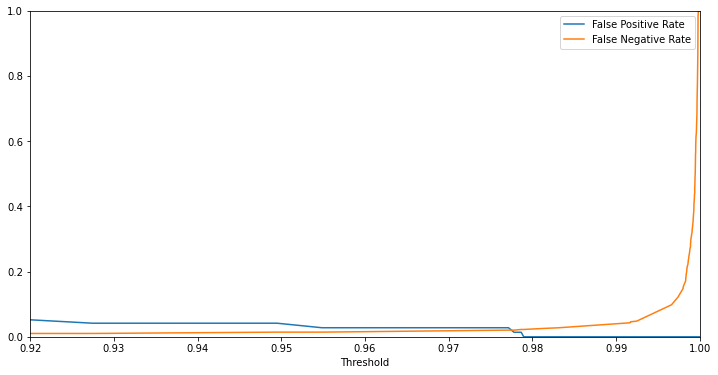

In [100]:
predtst=gbc.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(12,6))
ax.plot([10,10],[10,10]) #mark example thresh.
ax.set_xbound(0.92,1); ax.set_ybound(0,1) #zoom in

In [101]:
hardpredtst_tuned_thresh = np.where(predtst >= 0.975, 1, 0)
conf_matrix(ytest, hardpredtst_tuned_thresh)

,Pred 0(Approve as Non-operating),Pred 1(Deny as Operating)
True 0(Non-operating),TN = 70 (TNR = 97.22%),FP = 2 (FPR = 2.78%)
True 1(Operating),FN = 19 (FNR = 1.94%),TP = 959 (TPR = 98.06%)
